<a href="https://colab.research.google.com/github/SahajTC/Augmented-Financial-Intelligence/blob/main/ARIMA_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 600 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [34]:
import yfinance as yf

btc=yf.download(tickers='BTC-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#bitcoin
eth=yf.download(tickers='ETH-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#etherum
bnb=yf.download(tickers='BNB-USD', start='2020-01-01', end='2022-11-30', interval = '1d')#binance

aapl = yf.download(tickers='AAPL', start='2020-01-01', end='2022-11-30', interval = '1d')#apple
tsla=yf.download(tickers='TSLA', start='2020-01-01', end='2022-11-30', interval = '1d')#tesla
googl=yf.download(tickers='GOOGL', start='2020-01-01', end='2022-11-30', interval = '1d')#google

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [35]:
googl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.433998,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,68.075996,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.890503,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.755501,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.251999,35314000
...,...,...,...,...,...,...
2022-11-22,95.949997,97.220001,94.050003,97.050003,97.050003,23438500
2022-11-23,97.089996,98.760002,97.089996,98.459999,98.459999,18868100
2022-11-25,98.239998,98.639999,97.400002,97.459999,97.459999,9701400


In [36]:
import numpy as np,matplotlib.pyplot as plt,pandas as pd
import math
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
def clean_data(data):
  data.reset_index(inplace=True)
  data['Date'] = pd.to_datetime(data['Date'])
  df = data.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
  df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
  return df

In [42]:
def mod_train(df):
 to_row=int(len(df)*0.7)
 training_data=list(df[0:to_row]['Adj Close'])
 testing_data = list(df[to_row:]['Adj Close'])
 model_predictions = []
 n_test_obser=len(testing_data)
 for i in range(n_test_obser):
   model = ARIMA(training_data, order = (4,1,0))
   model_fit= model.fit()
   output = model_fit.forecast()
   y_pred=list(output[0])[0]
   model_predictions.append(y_pred)
   actual_test_value=testing_data[i]
   training_data.append(actual_test_value)
 plt.figure(figsize=(15,9))
 plt.grid(True)

 data_range=df[to_row:].index
 plt.plot( model_predictions, color="blue",marker="o",linestyle="dashed",label="BTC predicted price")
 plt.plot(testing_data,color="red",label="BTC Actual Price")

 plt.title("Bitcoin Price Prediction")
 plt.xlabel('Date')
 plt.ylabel('Price')
 plt.legend()
 plt.show()
 mape=np.mean(np.abs(np.array(model_predictions[:])-np.array(testing_data))/np.abs(testing_data))
 print("\nMAPE: ",str(mape))

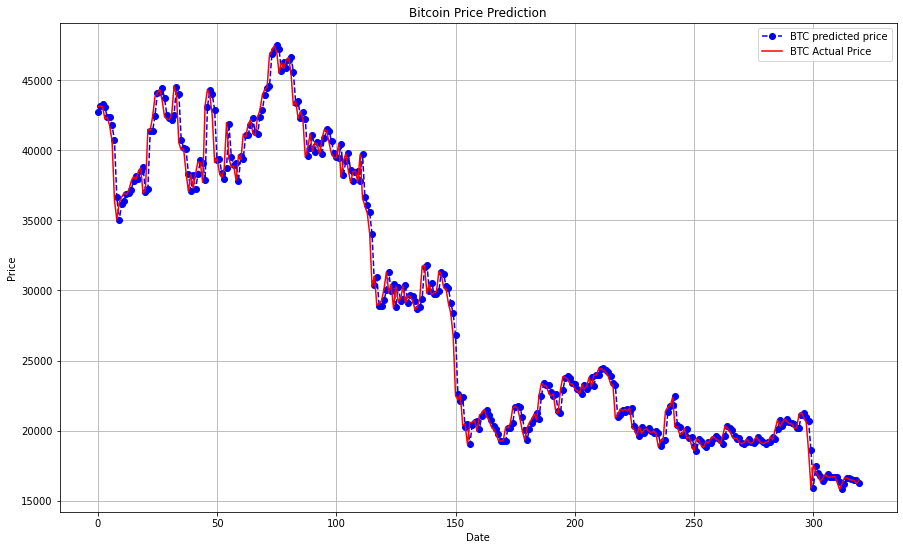


MAPE:  0.024215025577504184


In [43]:
mod_train(btc)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


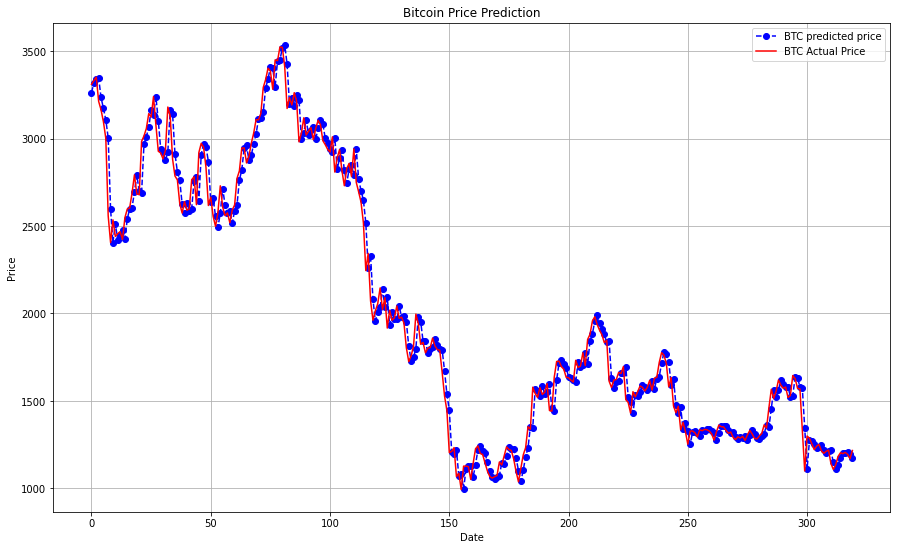


MAPE:  0.03456315723226759


In [44]:
mod_train(eth)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


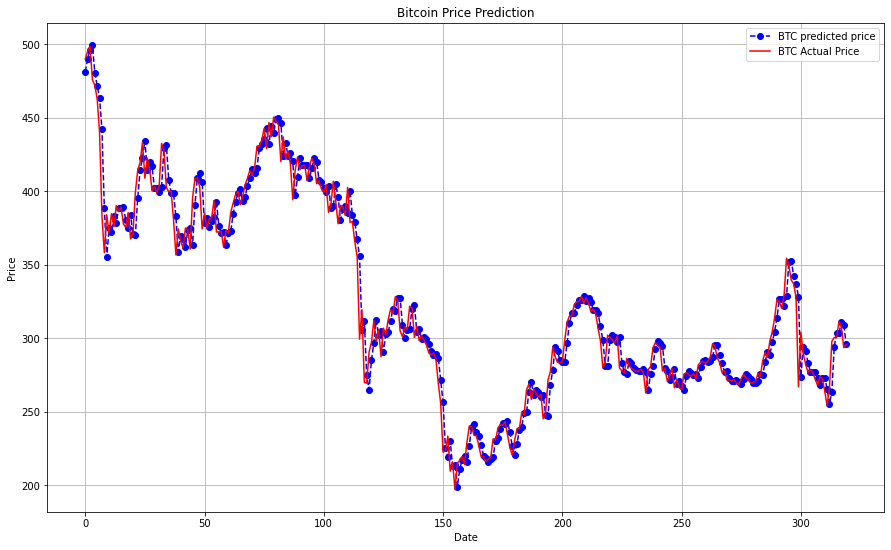


MAPE:  0.027287734290692877


In [45]:
mod_train(bnb)

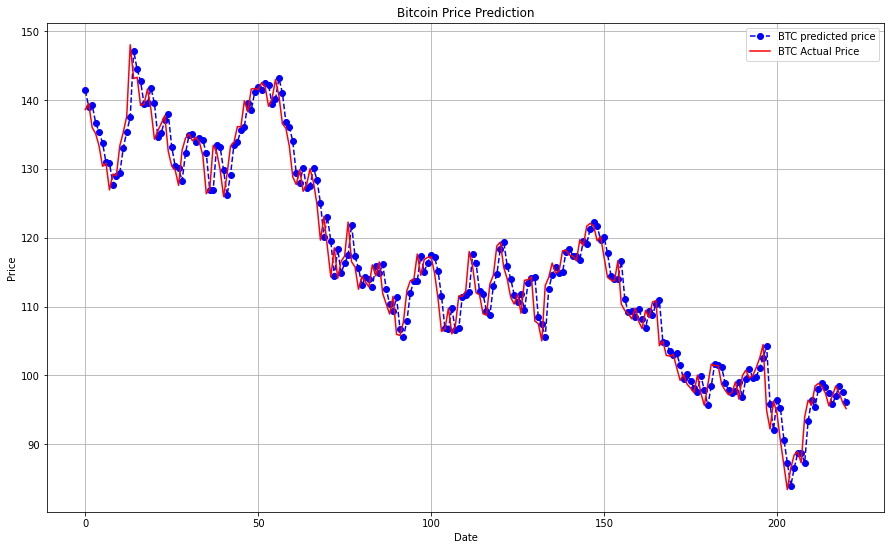


MAPE:  0.019686670012206035


In [46]:
mod_train(googl)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


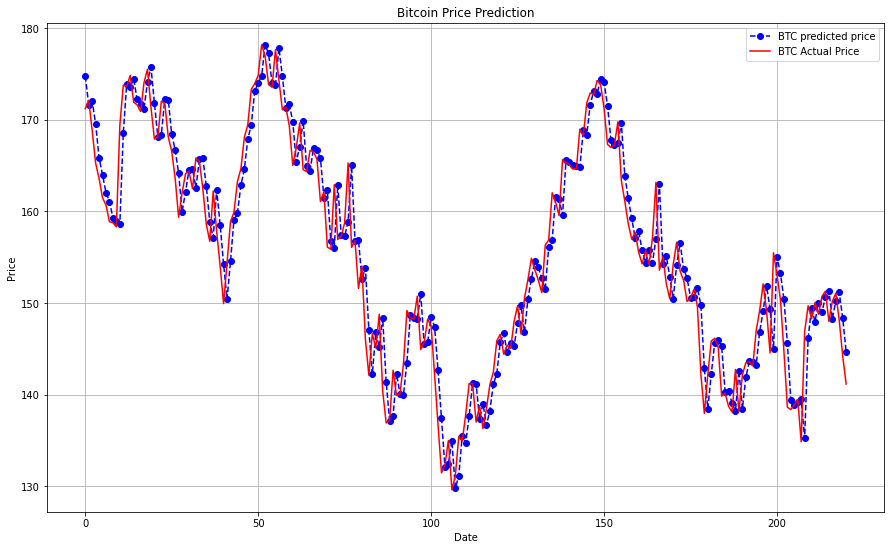


MAPE:  0.017935251767880498


In [47]:
mod_train(aapl)

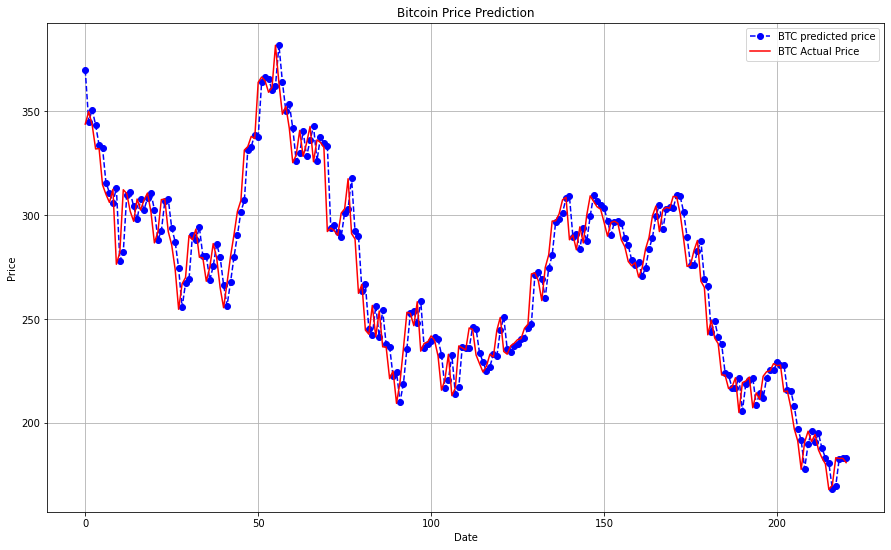


MAPE:  0.031396556925333136


In [48]:
mod_train(tsla)